In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [263]:
import warnings
warnings.simplefilter('ignore')

In [264]:
df = pd.read_csv('train.csv')

In [265]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [266]:
# First Column is ID only, thus dropping the column
df.drop(columns = 'Id', inplace = True)

In [267]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [268]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [269]:
# Checking non null count in individual columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [270]:
# Checking columns having high % of null values
null_df = df.isnull().sum() * 100 / len(df)
cols = list(null_df[null_df>39].index)
cols

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [271]:
# Dropping these columns as these are high in nature
df.drop(columns = cols, inplace = True)

In [272]:
# Checking reduces shape of data
df.shape

(1460, 75)

In [273]:
# Checking category count of each categorical column to check the skewness. Doing manual calculaion not using normalize as want to see
# the effect of null values present in the data
skew_cols = []
for col in df.columns:
    if df[col].dtypes == 'object':
        normalize_vals = df[col].value_counts() * 100 / 1460
        # Checking if single category if more than 80% . This shows data is highly skewed
        if (normalize_vals[0]> 80):
            skew_cols.append(col)
        print(normalize_vals)
        print('*******************************************')

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
*******************************************
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
*******************************************
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
*******************************************
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
*******************************************
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
*******************************************
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64
*******************************************
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64
******************************************

In [274]:
# Checking columns which was given by above code
skew_cols

['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [275]:
# Dropping columns which shows high data skewness
df.drop(columns = skew_cols, inplace = True)

In [276]:
# Checking shape of the data after removing columns
df.shape

(1460, 55)

In [277]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,61,0,0,0,0,0,2,2008,208500
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,298,0,0,0,0,0,0,5,2007,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,42,0,0,0,0,0,9,2008,223500
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,35,272,0,0,0,0,2,2006,140000
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,192,84,0,0,0,0,0,12,2008,250000


In [278]:
#Converting Column YearBuilt to AgeofBuilding
df['AgeOfBuilding'] = 2021 - df['YearBuilt']
df.drop(columns = ['YearBuilt'], inplace = True)

In [279]:
# Checking again the null values remaning in the data
df.isnull().sum() * 100/len(df)

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
LotShape          0.000000
LotConfig         0.000000
Neighborhood      0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
HeatingQC         0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
T

In [280]:
# Imputing null values in LotFrontage with median value
df['LotFrontage'][df['LotFrontage'].isnull()]= df['LotFrontage'].median()

In [281]:
# Imputing values for MasVnrType & MasVnrArea
df['MasVnrType'][df['MasVnrType'].isnull()] = 'No_Masory'
df['MasVnrArea'][df['MasVnrArea'].isnull()] = 0

In [282]:
# Imputing values for GarageType, GarageYrBlt , GarageFinish
df['GarageType'][df['GarageType'].isnull()] = 'No_Garage'
df['GarageYrBlt'][df['GarageYrBlt'].isnull()] = -9999
df['GarageFinish'][df['GarageFinish'].isnull()] = 'No_Garage'

In [283]:
df['BsmtQual'][df['BsmtQual'].isnull()] = 'No_Basement'
df['BsmtExposure'][df['BsmtExposure'].isnull()] = 'No_Basement'
df['BsmtFinType1'][df['BsmtFinType1'].isnull()] = 'No_Basement'

In [284]:
# Checking null values again to confirm that all imputations were sucessful
df.isnull().sum() * 100/len(df)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
LotShape         0.0
LotConfig        0.0
Neighborhood     0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearRemodAdd     0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
HeatingQC        0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch    

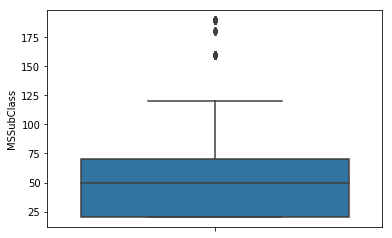

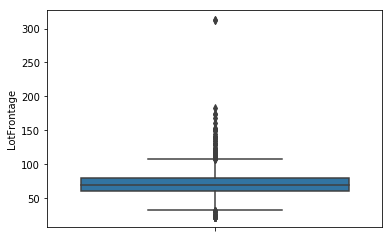

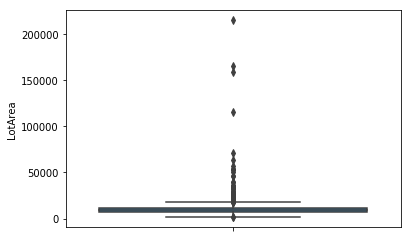

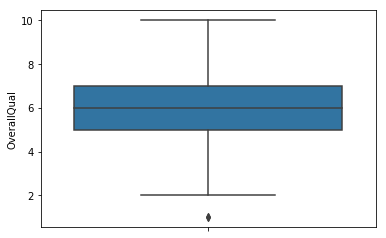

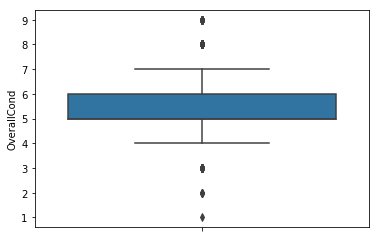

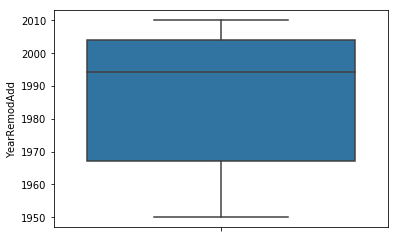

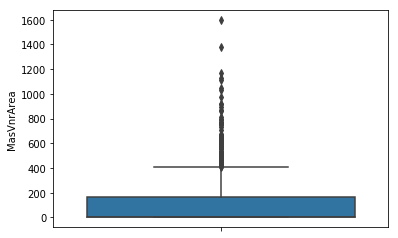

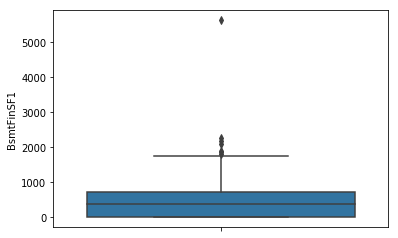

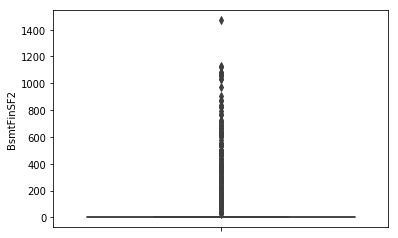

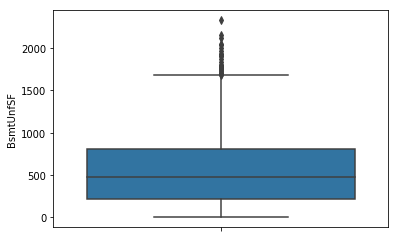

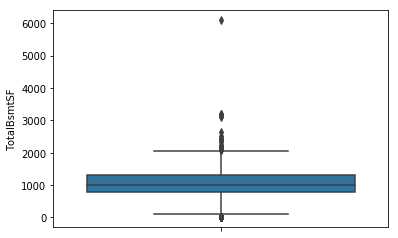

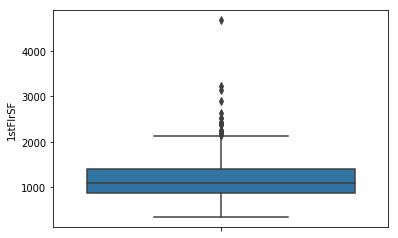

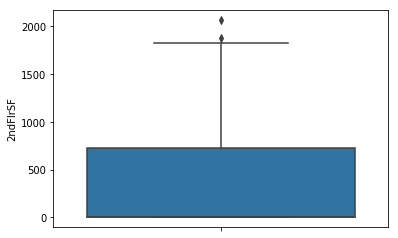

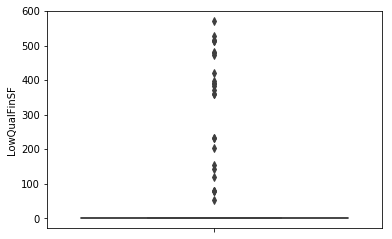

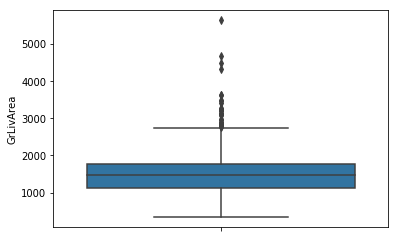

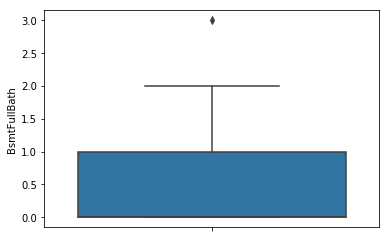

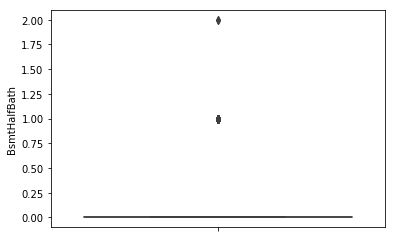

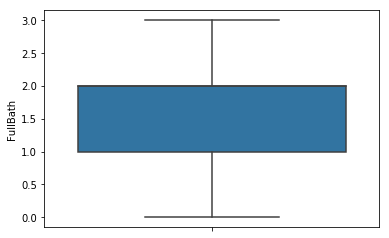

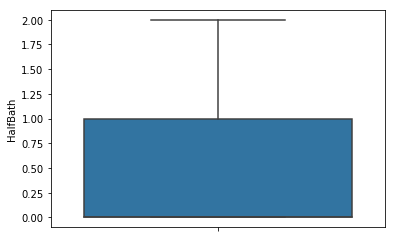

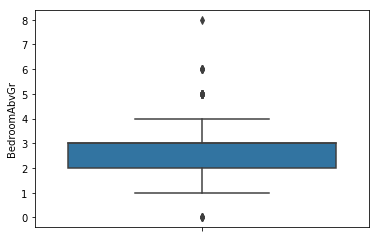

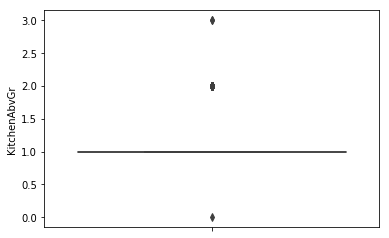

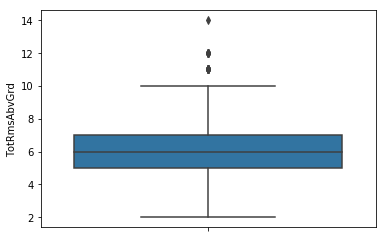

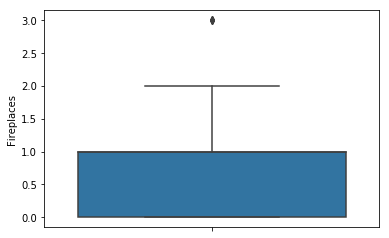

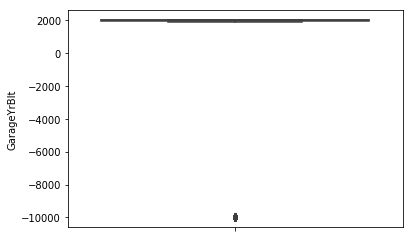

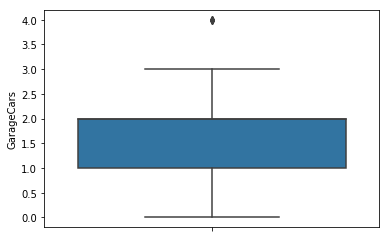

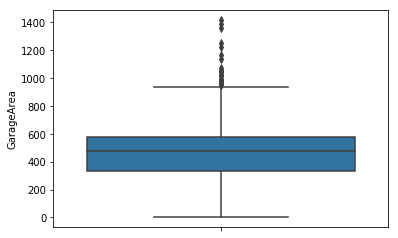

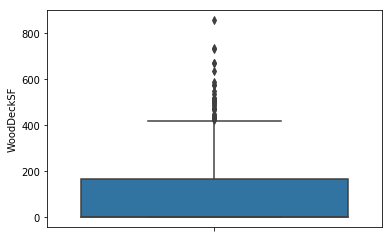

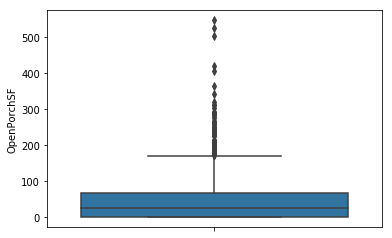

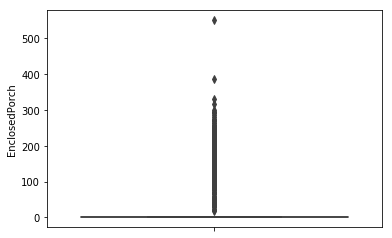

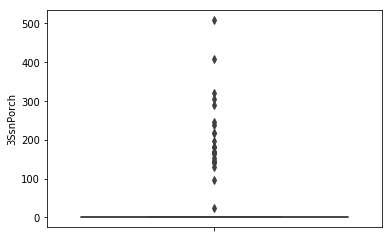

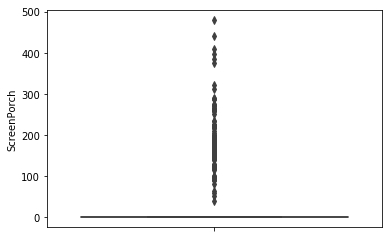

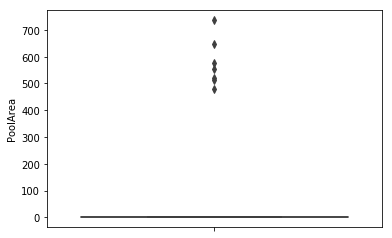

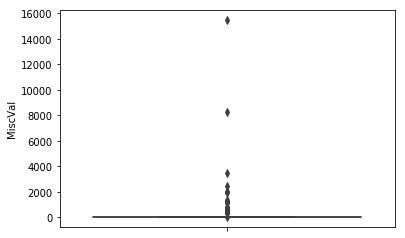

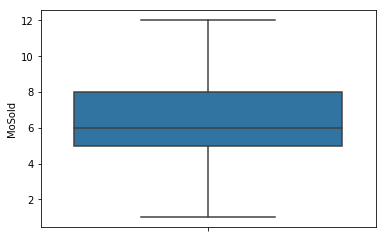

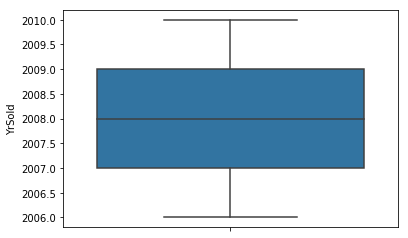

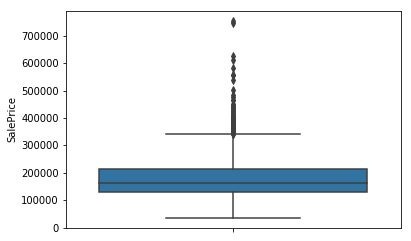

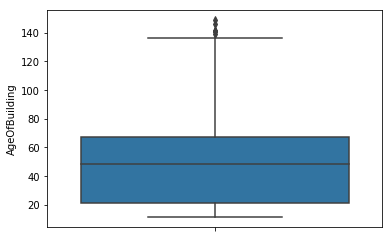

In [285]:
# Checking outliers present in the dataset for continous data
for col in df.columns:
    if df[col].dtypes != 'object':
        sns.boxplot(y = df[col])
        plt.show()

## Inference:
1. Some columns shows the presence of extreme outliers e.g lonfrontage, BsmtFinSF1
2. In some columns most of the values are same e.g BsmtFinSf2, LowQualFinSF, BsmtHalfBath, EnclosedPorch

In [286]:
# Performing outlier treatment. Softcapping the extreme outliers present
df['MSSubClass'][df['MSSubClass']>160] = 160
df['LotFrontage'][df['LotFrontage']>200] = 200
df['LotArea'][df['LotArea']>100000] = 100000
df['MasVnrArea'][df['MasVnrArea']>1300] = 1300
df['BsmtFinSF1'][df['BsmtFinSF1']>2500] = 2500
df['BsmtFinSF2'][df['BsmtFinSF2']>1200] = 1200
df['TotalBsmtSF'][df['TotalBsmtSF']>3500] = 3500
df['1stFlrSF'][df['1stFlrSF']>3500] = 3500
df['OpenPorchSF'][df['OpenPorchSF']>400] = 400
df['EnclosedPorch'][df['EnclosedPorch']>400] = 400

In [287]:
# Dropping Columns which are having most of the values as same, it shows that data is highly skewed
cols = ['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
df.drop(columns = cols, inplace = True)

In [288]:
# Dropping GarageYrBlt, YearRemodAdd, YrSold as it doesn't hold much importance
df.drop(columns = ['GarageYrBlt','YrSold','YearRemodAdd'], inplace = True)

In [289]:
df.shape

(1460, 43)

## Bivariate Analysis

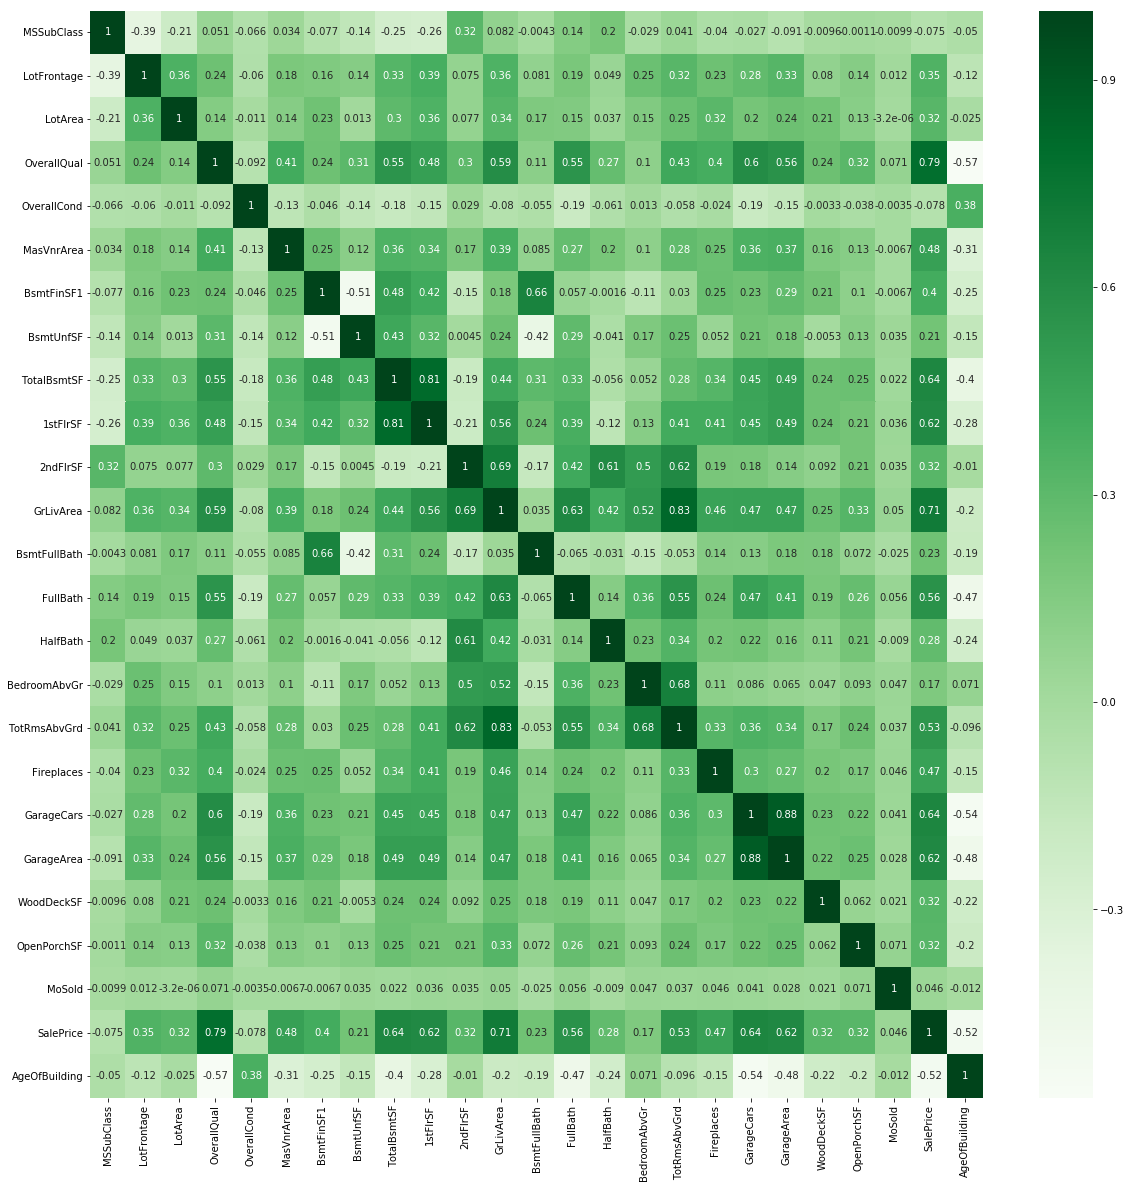

In [290]:
# Plotting correlation matrix to see the correlation between different variables
corr = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr, annot = True, cmap = 'Greens')
plt.show()

## Inference: 
1. 1stFlrSF and TotalBsmtSF shows high correlation.
2. TotRmsAbvGrd and GrLivArea shows high Correlation
3. GarageArea and Garage Cars shows high Correlation

In [291]:
# Dropping highly correlated variables
df.drop(columns = ['1stFlrSF','TotRmsAbvGrd','GarageArea'], inplace = True)

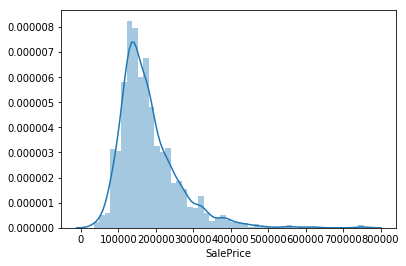

In [292]:
# Checking the target data skewness
sns.distplot(df['SalePrice'])
plt.show()

## Inference
1. Target Column (SalePrice) is right skewed. Thus we need to transform the data

In [293]:
#Doing Log Transform on the Target Feature(SalePrice) so that it should be normally distributed
df['Target_Sale'] =  np.log(df['SalePrice'])

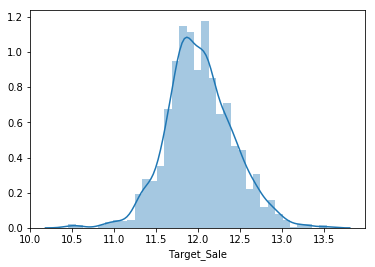

In [294]:
#Checking skewness after transformation
sns.distplot(df['Target_Sale'])
plt.show()

## Inference:
1. Data is normally distributed after log transformation.

In [295]:
#Dropping SalePrice column as it has been transformed
df.drop(columns = ['SalePrice'], inplace = True)

In [296]:
# Combining some categories in categorical columns whose contribution is <2%.
df['MSZoning'][df['MSZoning'].isin(['RH', 'C (all)'])] = 'Others'
df['Neighborhood'][df['Neighborhood'].isin(['ClearCr', 'SWISU','StoneBr','Blmngtn','MeadowV','BrDale','Veenker','NPkVill','Blueste'])] = 'Others'
df['HouseStyle'][df['HouseStyle'].isin(['1.5Unf', '2.5Unf','2.5Fin'])] = 'Others'
df['RoofStyle'][df['RoofStyle'].isin(['Flat', 'Gambrel','Mansard','Shed'])] = 'Others'
df['Exterior1st'][df['Exterior1st'].isin(['WdShing', 'Stucco','AsbShng','Stone','BrkComm','AsphShn','ImStucc','CBlock'])] = 'Others'
df['Exterior2nd'][df['Exterior2nd'].isin(['Stucco', 'BrkFace','AsbShng','ImStucc','Brk Cmn','Stone','AsphShn','Other','CBlock'])] = 'Others'
df['MasVnrType'][df['MasVnrType'].isin(['BrkCmn', 'No_Masory'])] = 'Others'
df['Foundation'][df['Foundation'].isin(['Slab', 'Stone', 'Wood'])] = 'Others'
df['GarageType'][df['GarageType'].isin(['Basment', 'CarPort','2Types'])] = 'Others'

In [297]:
# Checking shape of the data
df.shape

(1460, 40)

In [298]:
# Method for reating dummies columns for the categorical data
def dummiesVariable(var, df):
    status = pd.get_dummies(df[var], prefix = var, drop_first = True)
    df.drop(columns = [var], inplace = True)
    return pd.concat([df,status], axis= 1)

In [299]:
num_cols = list(df.dtypes[df.dtypes != 'object'].index)
cat_cols = list(df.dtypes[df.dtypes == 'object'].index)
for col in cat_cols:
    df = dummiesVariable(col, df)

In [300]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No_Garage,GarageType_Others,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf
0,60,65.0,8450,7,5,196.0,706,150,856,854,...,0,1,0,0,0,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,284,1262,0,...,0,0,1,0,0,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,434,920,866,...,0,1,0,0,0,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,540,756,756,...,0,1,0,0,1,0,0,0,0,1
4,60,84.0,14260,8,5,350.0,655,490,1145,1053,...,0,1,0,0,0,0,0,0,1,0


In [301]:
#Checking shape of the dataset after dummy creation
df.shape

(1460, 106)

In [302]:
#Dividing data into target column and features
y = df[['Target_Sale']]
df.drop(columns = ['Target_Sale'], inplace = True)
X = df

In [303]:
# Splitting Data into train test split
X_train, X_test,y_train, y_test = train_test_split(X,y,train_size = .7, random_state = 99)

In [304]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No_Garage,GarageType_Others,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf
472,160,35.0,3675,6,5,80.0,459,88,547,0,...,0,0,1,0,0,0,1,0,1,0
581,20,98.0,12704,8,5,306.0,0,2042,2042,0,...,0,0,0,0,0,0,0,0,1,0
162,20,95.0,12182,7,5,226.0,1201,340,1541,0,...,0,1,0,0,0,0,0,0,1,0
657,70,60.0,7200,7,6,0.0,0,776,776,651,...,0,0,1,0,0,0,0,0,1,0
520,160,60.0,10800,4,7,0.0,0,0,0,600,...,0,0,1,0,0,1,0,1,0,0
207,20,69.0,12493,4,5,0.0,419,375,1100,0,...,0,0,1,0,0,0,0,0,1,0
1354,60,69.0,10316,7,5,0.0,735,257,992,873,...,0,1,0,0,0,0,0,0,1,0
565,70,66.0,6858,6,4,0.0,0,806,806,806,...,1,0,0,0,1,0,0,0,0,1
1214,85,69.0,10205,5,5,0.0,784,141,925,0,...,0,0,1,0,0,0,0,0,0,1
1238,20,63.0,13072,6,5,0.0,0,1141,1141,0,...,0,0,1,0,1,0,0,0,0,1


In [305]:
#Removing the name of the target columns
num_cols = num_cols[:-1]

In [306]:
scaled = StandardScaler()
X_train[num_cols] = scaled.fit_transform(X_train[num_cols])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No_Garage,GarageType_Others,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf
472,2.591114,-1.672886,-0.899510,-0.083357,-0.522293,-0.117016,0.044962,-1.073531,-1.173568,-0.811100,...,0,0,1,0,0,0,1,0,1,0
581,-0.913559,1.295202,0.330285,1.371466,-0.522293,1.160830,-1.014579,3.351662,2.328746,-0.811100,...,0,0,0,0,0,0,0,0,1,0
162,-0.913559,1.153864,0.259186,0.644055,-0.522293,0.708496,1.757772,-0.502831,1.155061,-0.811100,...,0,1,0,0,0,0,0,0,1,0
657,0.338110,-0.495074,-0.419387,0.644055,0.384614,-0.569351,-1.014579,0.484571,-0.637093,0.656066,...,0,0,1,0,0,0,0,0,1,0
520,2.591114,-0.495074,0.070951,-1.538179,1.291521,-0.569351,-1.014579,-1.272824,-2.455017,0.541127,...,0,0,1,0,0,1,0,1,0,0


In [307]:
#scaling test data
X_test[num_cols] = scaled.transform(X_test[num_cols])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No_Garage,GarageType_Others,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf
57,0.087776,0.871189,0.186044,0.644055,-0.522293,-0.569351,-1.014579,0.674805,-0.440308,1.127092,...,0,1,0,0,0,0,0,0,1,0
887,-0.162558,-0.542186,0.842688,-0.810768,1.291521,-0.569351,-1.014579,0.575159,-0.543386,0.363084,...,0,0,1,0,0,0,0,0,0,1
1174,0.338110,0.447177,0.855492,-0.083357,2.198428,-0.569351,0.146531,-0.255980,-0.224781,1.837011,...,0,0,1,0,1,0,0,0,0,1
1164,0.588444,-0.071061,0.800601,-0.810768,1.291521,-0.569351,0.555112,-0.618330,0.731035,-0.811100,...,0,1,0,0,0,0,0,0,0,1
820,0.087776,0.070277,-0.415846,0.644055,-0.522293,-0.569351,-1.014579,0.534395,-0.585554,1.086525,...,0,1,0,0,0,0,0,0,1,0


In [308]:
#Using RFE to select top 60 features out of 105
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,60)
rfe = rfe.fit(X_train, y_train)

In [309]:
#Selecting columns
sel_cols = X_train.columns[rfe.support_]
sel_cols

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF',
       '2ndFlrSF', 'GrLivArea', 'GarageCars', 'AgeOfBuilding',
       'MSZoning_Others', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac',
       'LotConfig_FR3', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'HouseStyle_2Story',
       'HouseStyle_Others', 'HouseStyle_SLvl', 'RoofStyle_Others',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_Others', 'Exterior1st_Plywood', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd',
       'Exterior2nd_Others', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'ExterQual_Fa',
       'Foundation_PConc', 'BsmtQual_Fa', '

In [310]:
# Selecting only columns provided by RFE
X_train = X_train[sel_cols]
X_test = X_test[sel_cols]

## Implementing Ridge Regression

In [311]:
ridgereg  = Ridge(.01, random_state = 99)
ridgereg.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=99, solver='auto', tol=0.001)

In [312]:
#Using Grid Search will find optimal value of lambda and then will use the same for modelling
params = {'alpha': [.00001,.0001, .001, .01, 1,2,5,10,20,30,50,80,100,120,150]}
ridgereg  = Ridge(random_state = 99)
gridsearch = GridSearchCV(estimator = ridgereg, 
                          param_grid=params,
                          cv = 5,
                          verbose = 1,
                          scoring = 'neg_mean_absolute_error')
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=99, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 1, 2, 5, 10, 20, 30, 50, 80, 100, 120, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=1)

In [313]:
# Checking best lambda value
gridsearch.best_params_

{'alpha': 5}

In [314]:
#With lambda value as 5 , it gives the best estimator. 
# Implementing Ridge Regression with lambda value = 5
ridgereg = Ridge(5, random_state = 99)
ridgereg.fit(X_train, y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=99, solver='auto', tol=0.001)

In [315]:
# Checking R2 Score for training and testing
y_train_pred = ridgereg.predict(X_train)
y_test_pred = ridgereg.predict(X_test)
print('R2 Score Ridge Training', r2_score(y_true =y_train, y_pred = y_train_pred))
print('R2 Score Ridge Testing', r2_score(y_true =y_test, y_pred = y_test_pred))

R2 Score Ridge Training 0.905436338644438
R2 Score Ridge Testing 0.8431782231797191


## Lasso Regression

In [316]:
#Using Grid Search will find optimal value of lambda and then will use the same for modelling
params = {'alpha': [.00001,.0001, .001, .01, 1,2,5,10,20,30,50,80,100,120,150]}
lassoreg  = Lasso(random_state = 99)
gridsearch = GridSearchCV(estimator = lassoreg, 
                          param_grid=params,
                          cv = 5,
                          verbose = 1,
                          scoring = 'neg_mean_absolute_error')
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=99,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 1, 2, 5, 10, 20, 30, 50, 80, 100, 120, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=1)

In [317]:
#Checking the best value from Grid Search to get best value of lambda
gridsearch.best_params_

{'alpha': 0.0001}

In [318]:
#With lambda value as .0001, it gives the best lasso estimator
# Implementing Lasso Regression with lambda = .0001
lassoreg = Lasso(.0001, random_state = 99)
lassoreg.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=99,
   selection='cyclic', tol=0.0001, warm_start=False)

In [319]:
# Checking R2 Score for training and testing
y_train_pred = lassoreg.predict(X_train)
y_test_pred = lassoreg.predict(X_test)
print('R2 Score Lasso Training', r2_score(y_true =y_train, y_pred = y_train_pred))
print('R2 Score Lasso Testing', r2_score(y_true =y_test, y_pred = y_test_pred))

R2 Score Lasso Training 0.9074585962751028
R2 Score Lasso Testing 0.8371189524508963


In [320]:
#Creating Data Frame of coefficient provided by Ridge and Lasso
model_coeff = pd.DataFrame({'cols': list(X_train.columns), 'Ridge':list(ridgereg.coef_[0]), 'Lasso': list(lassoreg.coef_)})

In [321]:
#Getting top 5 Variables according to Ridge
model_coeff.sort_values(by = 'Ridge', ascending = False,inplace = True)
model_coeff['cols'].iloc[:5]

14    Neighborhood_Crawfor
6                GrLivArea
2              OverallQual
4              TotalBsmtSF
20    Neighborhood_NridgHt
Name: cols, dtype: object

## Top 5 Variables according to Ridge Regression
### Neighborhood_Crawfor, GrLivArea, OverallQual, TotalBsmtSF, Neighborhood_NridgHt

In [322]:
#Getting top 5 Variables according to Lasso
model_coeff.sort_values(by = 'Lasso', ascending = False,inplace = True)
model_coeff['cols'].iloc[:5]

14    Neighborhood_Crawfor
6                GrLivArea
2              OverallQual
4              TotalBsmtSF
20    Neighborhood_NridgHt
Name: cols, dtype: object

## Top 5 Variables according to Lasso Regression
### Neighborhood_Crawfor, GrLivArea, OverallQual, TotalBsmtSF, Neighborhood_NridgHt

## Using only top 5 Variables and checking how much variance it is able to explain

In [323]:
# Performing Ridge Regression on the basis of top 5 variables to see how much they are able to explain
X_train_ridge = X_train.drop(columns = ['Neighborhood_Crawfor', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'Neighborhood_NridgHt'])
X_test_ridge = X_test.drop(columns = ['Neighborhood_Crawfor', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'Neighborhood_NridgHt'])
ridgereg_ = Ridge(5, random_state = 99)
ridgereg_.fit(X_train_ridge, y_train)
# Checking R2 Score for training and testing
y_train_pred_ = ridgereg_.predict(X_train_ridge)
y_test_pred_ = ridgereg_.predict(X_test_ridge)
print('R2 Score Ridge Training top 5 variales', r2_score(y_true =y_train, y_pred = y_train_pred_))
print('R2 Score Ridge Testing top 5 variables', r2_score(y_true =y_test, y_pred = y_test_pred_))

R2 Score Ridge Training top 5 variales 0.8276222941219616
R2 Score Ridge Testing top 5 variables 0.7579253911842875


In [324]:
# Performing Lasso Regression on the basis of top 5 variables to see how much they are able to explain
X_train_lasso = X_train.drop(columns = ['Neighborhood_Crawfor', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'Neighborhood_NridgHt'])
X_test_lasso = X_test.drop(columns = ['Neighborhood_Crawfor', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'Neighborhood_NridgHt'])
lassoreg_ = Lasso(.0001, random_state = 99)
lassoreg_.fit(X_train_lasso, y_train)
# Checking R2 Score for training and testing
y_train_pred_ = lassoreg_.predict(X_train_lasso)
y_test_pred_ = lassoreg_.predict(X_test_lasso)
print('R2 Score Lasso Training top 5 variables', r2_score(y_true =y_train, y_pred = y_train_pred_))
print('R2 Score Lasso Testing top 5 variables', r2_score(y_true =y_test, y_pred = y_test_pred_))

R2 Score Lasso Training top 5 variables 0.8334320727373005
R2 Score Lasso Testing top 5 variables 0.7487674657121972


## Inference: The model with top 5 variables is able to explain 75% of variance of the target column